In [8]:
import numpy as np

# Question 1

Implement an LCG-based random number generator for uniform random numbers and experiment with different values for $a, c, M$.

In [128]:
def lcg(x_i, a, c, M):
    while True:
        x_i = (a * x_i + c) % M
        yield x_i/M

In [70]:
import sys
sys.setrecursionlimit(100000)

def lcg_r(seed, n):
    a = 34
    c = 241
    M = 4218
    
    def flatten(S):
        if S == []:
            return S
        if isinstance(S[0], list):
            return flatten(S[0]) + flatten(S[1:])
        return S[:1] + flatten(S[1:])
    
    def lcg_recurse(x_i, n):
        x = (a * x_i + c) % M
        if n is 1:
            return x/M
        return [x_i/M, lcg_recurse(x, n-1)]
    
    return flatten(lcg_recurse(seed, n))

## Speed test

Time to generate 10000 numbers.

* LCG recursive: 325 ms
* LCG iterative:   4.2 ms
* Python random:   4.53 ms
* Numpy random:  0.611 ms

Taking LCG recursive as a baseline then

* LCG recursive: 1
* LCG iterative: 77
* Python random: 71
* Numpy random:  532

In [50]:
%time x_r = lcg_r(0, 10000)

CPU times: user 375 ms, sys: 8.28 ms, total: 383 ms
Wall time: 385 ms


In [51]:
%time x = lcg(0, 10000)

CPU times: user 4.59 ms, sys: 75 µs, total: 4.66 ms
Wall time: 4.62 ms


In [53]:
import random
%time x_p = [random.uniform(0, 1) for _ in range(10000)]

CPU times: user 5.77 ms, sys: 80 µs, total: 5.85 ms
Wall time: 5.8 ms


In [55]:
%time x_n = np.random.uniform(0, 1, 10000)

CPU times: user 694 µs, sys: 509 µs, total: 1.2 ms
Wall time: 550 µs


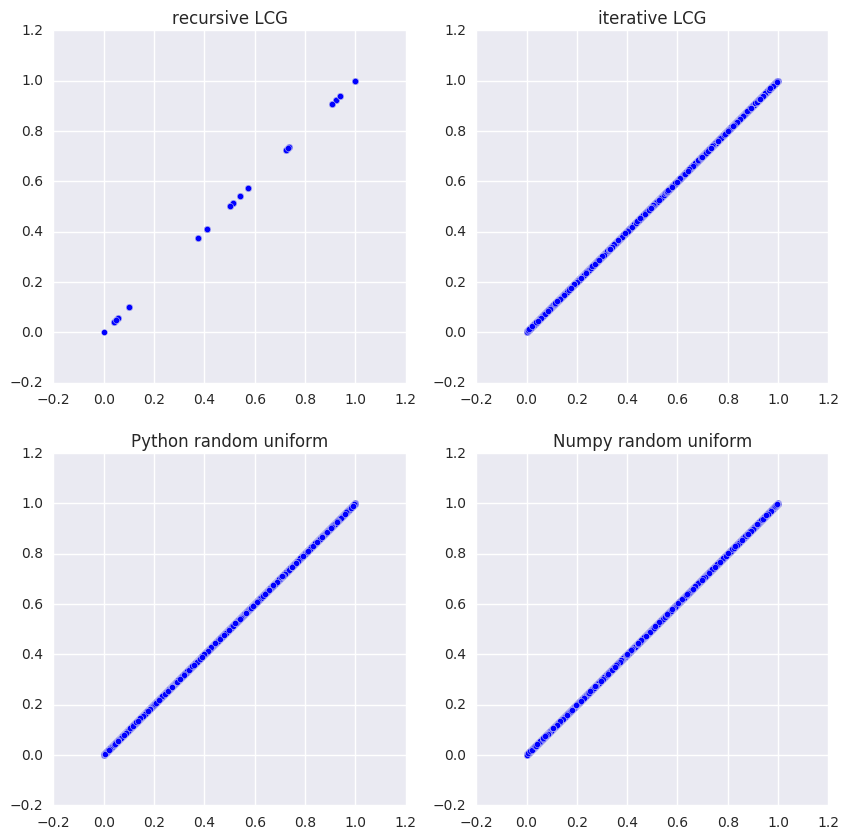

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from itertools import islice

f, axarr = plt.subplots(2, 2, figsize=(10, 10))
r = np.linspace(0, 1, 10000)

axarr[0, 0].scatter(x_r, x_r)
axarr[0, 0].set_title("recursive LCG")

x = list(islice(lcg(0, 135412, 5121, 1712289), 10000))

axarr[0, 1].scatter(x, x)
axarr[0, 1].set_title("iterative LCG")

axarr[1, 0].scatter(x_p, x_p)
axarr[1, 0].set_title("Python random uniform")

axarr[1, 1].scatter(x_n, x_n)
axarr[1, 1].set_title("Numpy random uniform")

plt.show()

In [151]:
def left_shift(x):
    return [0] + x[:-1]

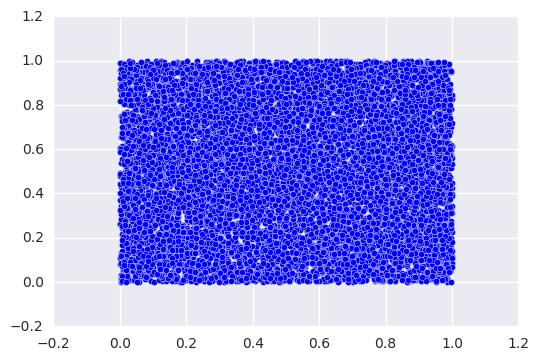

In [153]:
plt.scatter(x, left_shift(x))

# Question 2

Apply different statistical tests to the generator.

We do a Kolmogorov-Smirnov test on the empirical data.

In [298]:
lcg_gen = lcg(0, 135412, 5121, 1712289)
take = lambda f, n: list(islice(f, n))

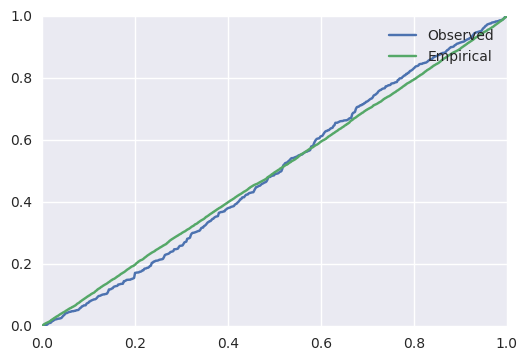

In [299]:
x = take(lcg_gen, 500)
a, = plt.plot(1.0*np.arange(len(x))/(len(x) - 1), np.sort(x))

y = np.random.uniform(0, 1, 10000)
b, = plt.plot(1.0*np.arange(len(y))/(len(y) - 1), np.sort(y))

plt.legend([a, b], ["Observed", "Empirical"])

plt.show()

In [300]:
def ks(x):
    n = m = len(x)
    D = np.max(np.sort(x) - np.sort(np.random.uniform(0, 1, m)))
    c = 1.36 # c(alpha) value for p = 0.05
    value = c * np.sqrt((n+m)/n*m)
    
    # if True then reject
    return D > value

In [301]:
ks(x)

False

In [302]:
from scipy.stats import kstest
kstest(np.random.uniform(0, 1, 10000), 'uniform')

KstestResult(statistic=0.015398453438722481, pvalue=0.017438047041033956)

We accept the null hypothesis because p > 0.05 therefore, this is a uniform distribution.

# Run tests

In [385]:
def up_down(x):
    inf = -99999999
    x = x.copy() + [-inf]
    n = len(x)
    
    count = 1
    for i in range(n):
        if x[i+1] < x[i]:
            yield count
            count = 0
        count += 1

In [386]:
a = [0, 1, 2, 0, 4, 8, 4, 5]

In [387]:
list(up_down(a))

IndexError: list index out of range

In [375]:
a

[0, 1, 2, 0, 4, 8, 4, 5]